## A Model to predict what type of Consumer uses the EV, based on Charging Patterns

In [1]:
## Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Loading the data
df = pd.read_csv('ev_charging_patterns.csv')

In [3]:
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [5]:
df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [6]:
df.isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

### EDA & Feature Engineering

In [7]:
 df.groupby('Charging Duration (hours)')['Energy Consumed (kWh)'].mean()

Charging Duration (hours)
0.095314    74.739388
0.140030    41.654845
0.154301    35.157377
0.165394    26.756920
0.182480    56.198366
              ...    
6.176417    13.726134
6.494007    16.554624
6.759152    39.676670
6.773095    18.307374
7.635145    76.892400
Name: Energy Consumed (kWh), Length: 1320, dtype: float64

In [8]:
df['Energy Consumed (kWh)'] = df['Energy Consumed (kWh)'].fillna( df.groupby('Charging Duration (hours)')['Battery Capacity (kWh)'].transform('mean'))
df['Charging Rate (kW)'] = df['Charging Rate (kW)'].fillna( df.groupby('Charging Duration (hours)')['Energy Consumed (kWh)'].transform('mean'))
df['Distance Driven (since last charge) (km)'] = df['Distance Driven (since last charge) (km)'].fillna( df.groupby('Charging Duration (hours)')['Energy Consumed (kWh)'].transform('mean'))

<Axes: >

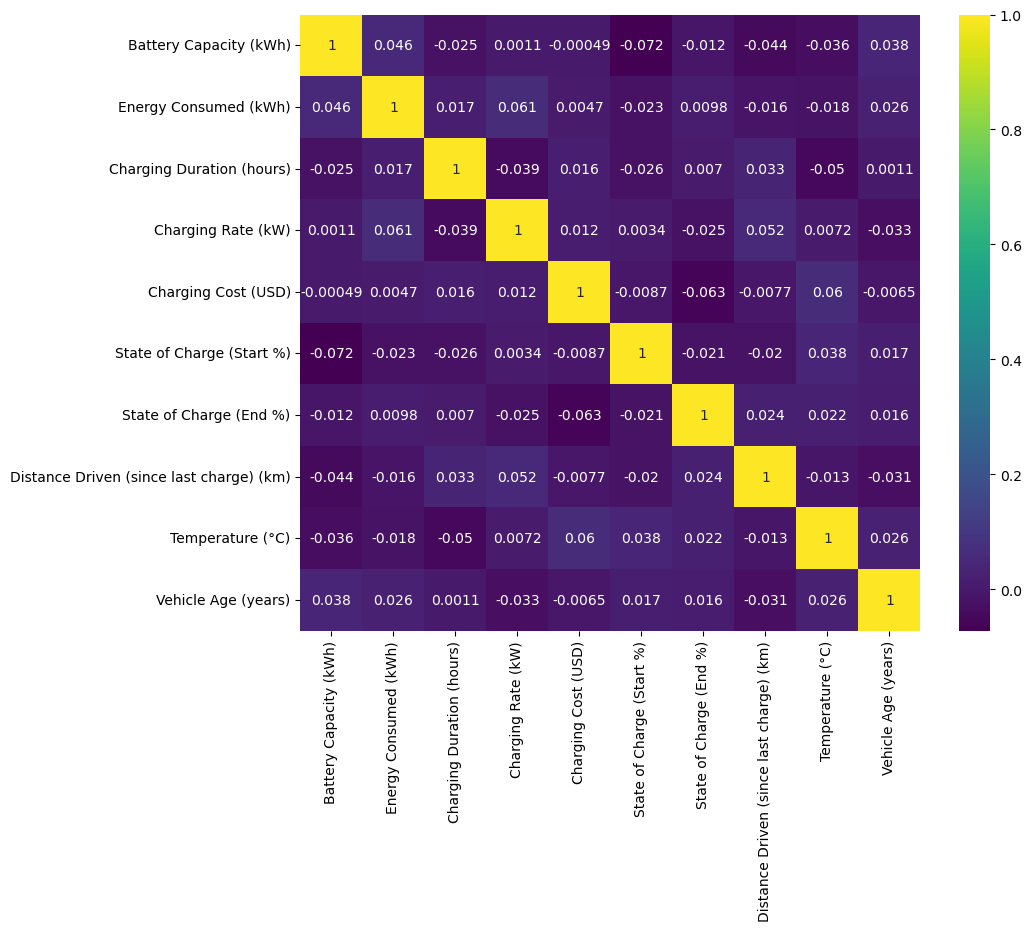

In [9]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'viridis')

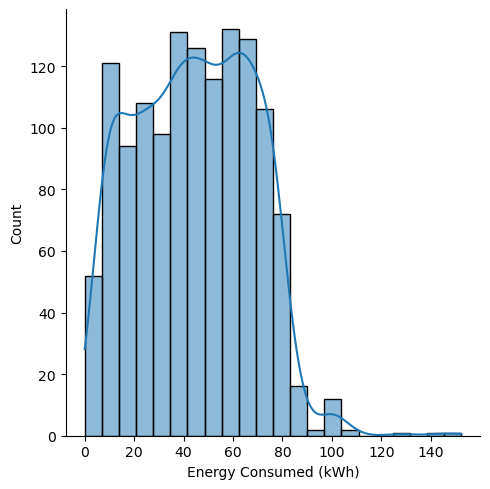

In [10]:
sns.displot(x = 'Energy Consumed (kWh)', data = df, kde = True)

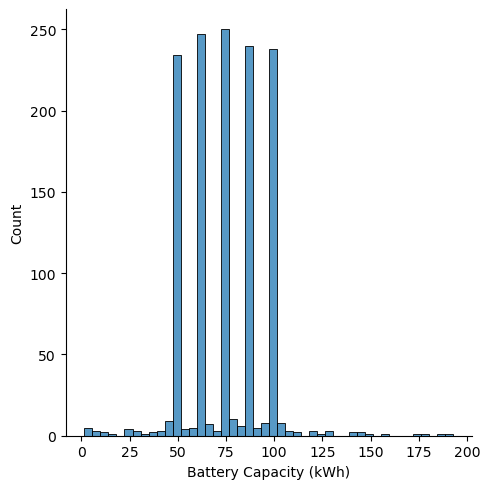

In [11]:
sns.displot(x = 'Battery Capacity (kWh)', data = df)

<Axes: xlabel='Charging Duration (hours)', ylabel='Charging Rate (kW)'>

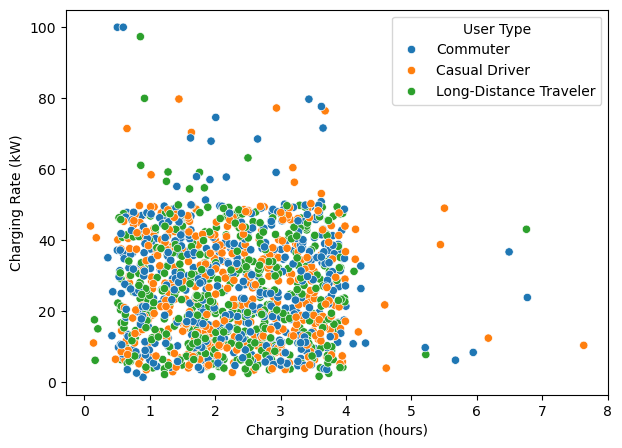

In [12]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Charging Duration (hours)', y = 'Charging Rate (kW)', data = df, hue = 'User Type')

In [13]:
# df = df[df['Energy Consumed (kWh)'] <= 80]

<Axes: xlabel='Charging Cost (USD)', ylabel='Charging Rate (kW)'>

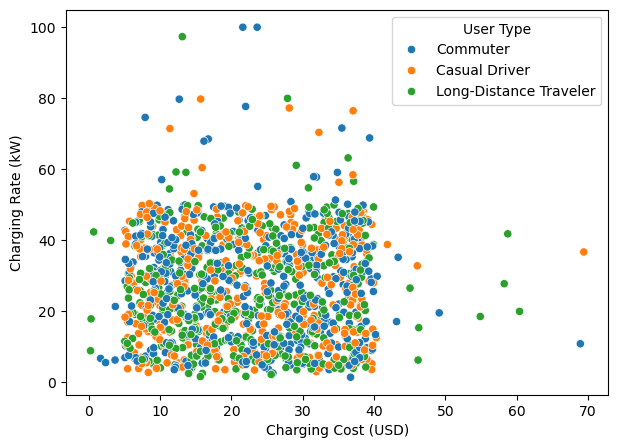

In [14]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Charging Cost (USD)', y = 'Charging Rate (kW)', data = df, hue = 'User Type')

<Axes: xlabel='State of Charge (Start %)', ylabel='Charging Rate (kW)'>

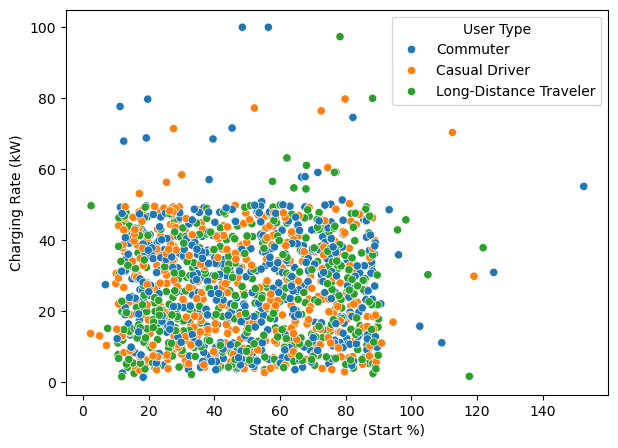

In [15]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = 'State of Charge (Start %)', y = 'Charging Rate (kW)', data = df, hue = 'User Type')

<Axes: xlabel='State of Charge (Start %)', ylabel='State of Charge (End %)'>

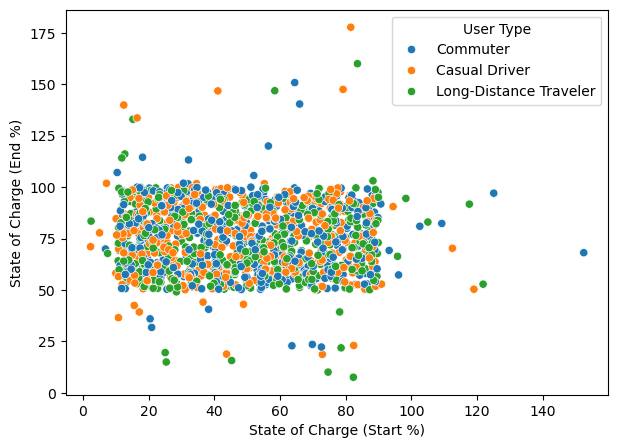

In [16]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = 'State of Charge (Start %)', y = 'State of Charge (End %)', data = df, hue = 'User Type')

<Axes: xlabel='Temperature (°C)', ylabel='Charging Rate (kW)'>

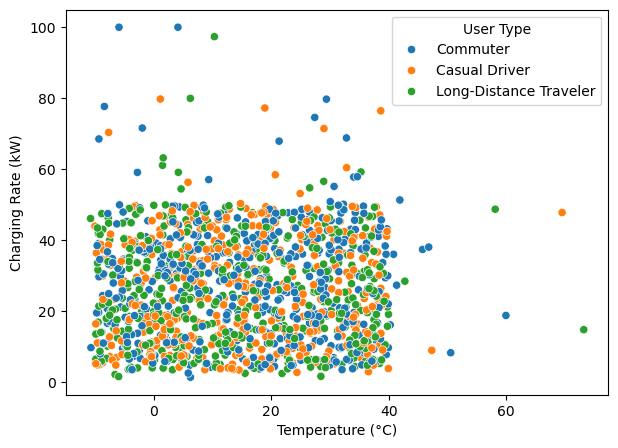

In [17]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Temperature (°C)', y = 'Charging Rate (kW)', data = df, hue = 'User Type')

<Figure size 700x500 with 0 Axes>

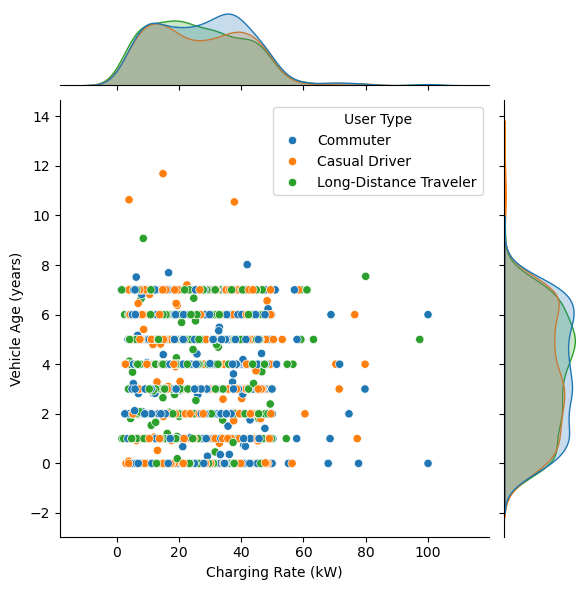

In [18]:
plt.figure(figsize = (7,5))
sns.jointplot(x = 'Charging Rate (kW)', y = 'Vehicle Age (years)', data = df, hue = 'User Type')

In [19]:
df.select_dtypes(['float']).columns

Index(['Battery Capacity (kWh)', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'State of Charge (Start %)',
       'State of Charge (End %)', 'Distance Driven (since last charge) (km)',
       'Temperature (°C)', 'Vehicle Age (years)'],
      dtype='object')

In [20]:
df['Vehicle Model'].value_counts()

Vehicle Model
Tesla Model 3    280
Hyundai Kona     266
Nissan Leaf      260
BMW i3           258
Chevy Bolt       256
Name: count, dtype: int64

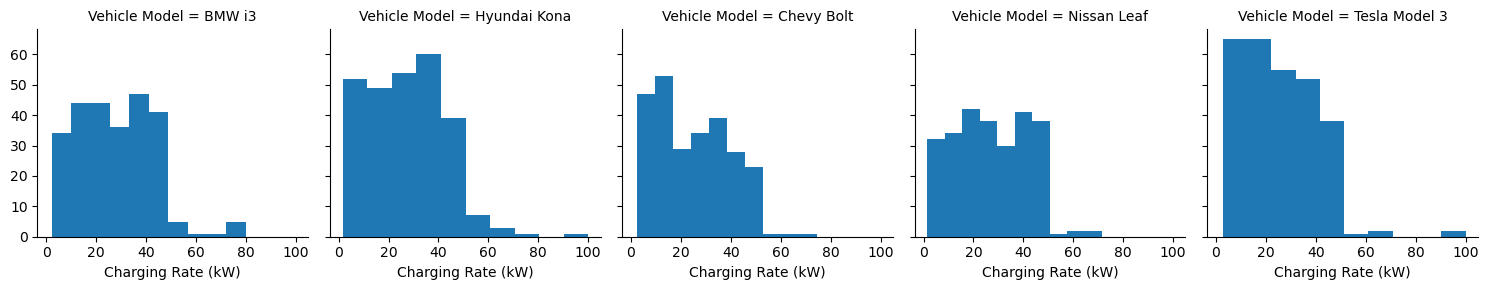

In [21]:
g = sns.FacetGrid(df, col='Vehicle Model')
g.map(plt.hist, 'Charging Rate (kW)')

In [22]:
df.select_dtypes(['object']).columns

Index(['User ID', 'Vehicle Model', 'Charging Station ID',
       'Charging Station Location', 'Charging Start Time', 'Charging End Time',
       'Time of Day', 'Day of Week', 'Charger Type', 'User Type'],
      dtype='object')

In [23]:
df['Charging Station Location'].value_counts()

Charging Station Location
Los Angeles      297
San Francisco    264
Houston          262
New York         255
Chicago          242
Name: count, dtype: int64

In [24]:
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])

In [25]:
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])

In [26]:
df['Start_Hour'] = df['Charging Start Time'].dt.hour
df['Start_Day'] = df['Charging Start Time'].dt.day_name()

In [27]:
df['End_Hour'] = df['Charging End Time'].dt.hour
df['End_Day'] = df['Charging End Time'].dt.day_name()

In [28]:
df['Start_Day'].value_counts()

Start_Day
Monday       192
Tuesday      192
Wednesday    192
Thursday     192
Friday       192
Saturday     192
Sunday       168
Name: count, dtype: int64

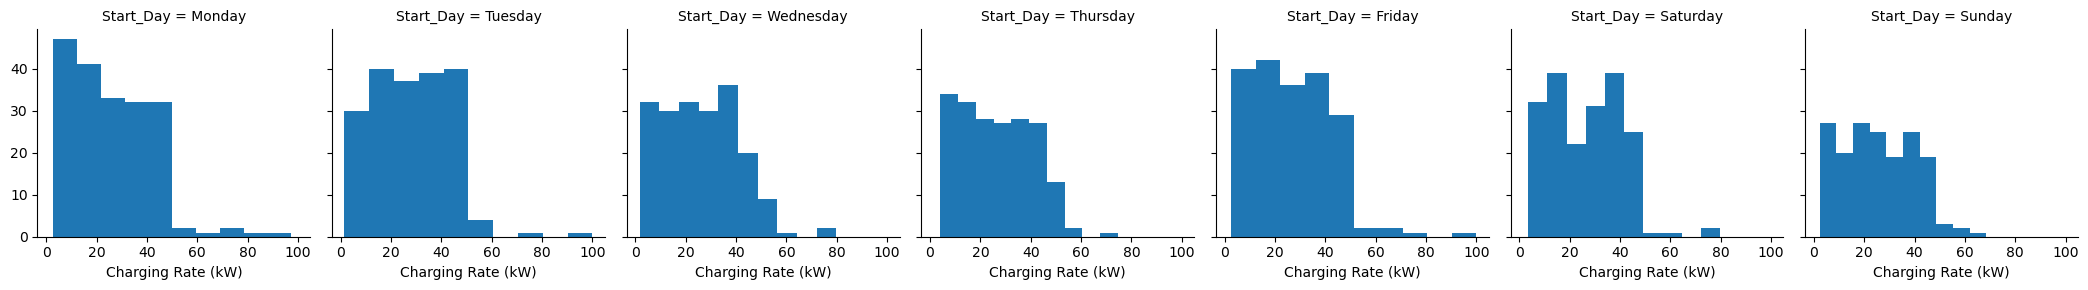

In [29]:
g = sns.FacetGrid(df, col='Start_Day')
g.map(plt.hist, 'Charging Rate (kW)')

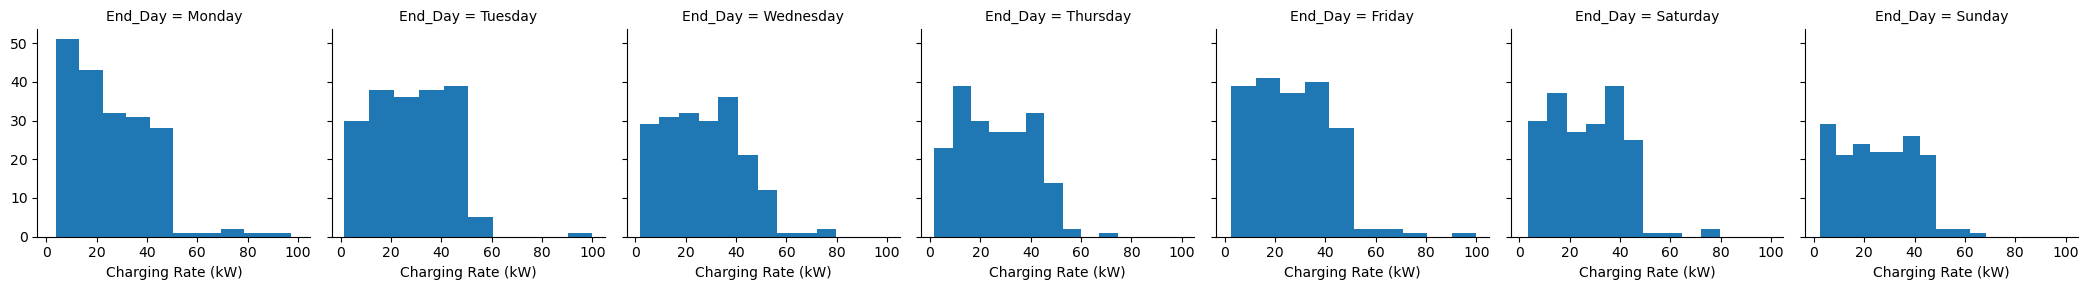

In [30]:
g = sns.FacetGrid(df, col='End_Day')
g.map(plt.hist, 'Charging Rate (kW)')

### Cleaning

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   User ID                                   1320 non-null   object        
 1   Vehicle Model                             1320 non-null   object        
 2   Battery Capacity (kWh)                    1320 non-null   float64       
 3   Charging Station ID                       1320 non-null   object        
 4   Charging Station Location                 1320 non-null   object        
 5   Charging Start Time                       1320 non-null   datetime64[ns]
 6   Charging End Time                         1320 non-null   datetime64[ns]
 7   Energy Consumed (kWh)                     1320 non-null   float64       
 8   Charging Duration (hours)                 1320 non-null   float64       
 9   Charging Rate (kW)            

In [32]:
##Dropping Unimportant columns
df = df.drop(['User ID', 'Charging Start Time', 'Charging End Time', 
              'Time of Day', 'Day of Week', 
              'Start_Day', 'End_Day'], 
             axis = 1)

In [33]:
## Converting Categorical Columns to Variables
df = pd.get_dummies(df, 
                    columns = ['Vehicle Model', 'Charging Station ID', 
                    'Charging Station Location','Charger Type'],
                    drop_first = True
                   )

In [34]:
df.head()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),...,Charging Station ID_Station_96,Charging Station ID_Station_97,Charging Station ID_Station_98,Charging Station ID_Station_99,Charging Station Location_Houston,Charging Station Location_Los Angeles,Charging Station Location_New York,Charging Station Location_San Francisco,Charger Type_Level 1,Charger Type_Level 2
0,108.463007,60.712346,0.591363,36.389181,13.087717,29.371576,86.119962,293.602111,27.947953,2.0,...,False,False,False,False,True,False,False,False,False,False
1,100.000000,12.339275,3.133652,30.677735,21.128448,10.115778,84.664344,112.112804,14.311026,3.0,...,False,False,False,False,False,False,False,True,True,False
2,75.000000,19.128876,2.452653,27.513593,35.667270,6.854604,69.917615,71.799253,21.002002,2.0,...,False,False,False,False,False,False,False,True,False,True
3,50.000000,79.457824,1.266431,32.882870,13.036239,83.120003,99.624328,199.577785,38.316313,1.0,...,False,False,False,False,True,False,False,False,True,False
4,50.000000,19.629104,2.019765,10.215712,10.161471,54.258950,63.743786,203.661847,-7.834199,1.0,...,False,False,False,False,False,True,False,False,True,False


In [35]:
df.isnull().sum()

Battery Capacity (kWh)                     0
Energy Consumed (kWh)                      0
Charging Duration (hours)                  0
Charging Rate (kW)                         0
Charging Cost (USD)                        0
                                          ..
Charging Station Location_Los Angeles      0
Charging Station Location_New York         0
Charging Station Location_San Francisco    0
Charger Type_Level 1                       0
Charger Type_Level 2                       0
Length: 484, dtype: int64

In [36]:
X = df.drop('User Type', axis = 1)
y = df['User Type']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=102)

### Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
X_train = scaler.fit_transform (X_train)

In [42]:
X_test = scaler.transform (X_test)

### Training the Model

### Using Random Forest Model

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier(n_estimators = 200)

In [45]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [46]:
rfc_pred = rfc.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print (classification_report(y_test,rfc_pred))
print('\n')
print (confusion_matrix(y_test,rfc_pred))

                        precision    recall  f1-score   support

         Casual Driver       0.29      0.23      0.26        97
              Commuter       0.38      0.39      0.39       127
Long-Distance Traveler       0.35      0.42      0.38       106

              accuracy                           0.35       330
             macro avg       0.34      0.35      0.34       330
          weighted avg       0.35      0.35      0.35       330



[[22 40 35]
 [32 50 45]
 [21 41 44]]


In [49]:
importances = rfc.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False)

feat_imp.head(10)

,Feature,Importance
8,Temperature (°C),0.062840
4,Charging Cost (USD),0.060069
5,State of Charge (Start %),0.059609
6,State of Charge (End %),0.059463
1,Energy Consumed (kWh),0.059105
3,Charging Rate (kW),0.058690
7,Distance Driven (since last charge) (km),0.058058
2,Charging Duration (hours),0.057336
11,End_Hour,0.048711
10,Start_Hour,0.047091


In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test = le.transform(y_test)

### Synthetic Minority Oversampling Technique

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
smote = SMOTE(random_state = 42)
X_train,y_train = smote.fit_resample(X_train,y_train_enc)

### XG boosting

In [54]:
from xgboost import XGBClassifier

In [55]:
xgb_model = XGBClassifier(
    n_estimators = 400,
    learning_rate = 0.05,
    max_depth = 6,
    random_state = 42,
    eval_metric = 'mlogloss'
)

In [56]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [57]:
xgb_pred = xgb_model.predict(X_test)

In [58]:
print (classification_report(y_test,xgb_pred))
print('\n')
print (confusion_matrix(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.29      0.29      0.29        97
           1       0.37      0.34      0.36       127
           2       0.31      0.35      0.33       106

    accuracy                           0.33       330
   macro avg       0.33      0.33      0.32       330
weighted avg       0.33      0.33      0.33       330



[[28 35 34]
 [36 43 48]
 [32 37 37]]


### Using KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [61]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [62]:
k_pred = knn.predict(X_test)

In [63]:
print (classification_report(y_test,k_pred))
print('\n')
print (confusion_matrix(y_test,k_pred))

              precision    recall  f1-score   support

           0       0.31      0.43      0.36        97
           1       0.36      0.28      0.31       127
           2       0.31      0.28      0.29       106

    accuracy                           0.32       330
   macro avg       0.33      0.33      0.32       330
weighted avg       0.33      0.32      0.32       330



[[42 24 31]
 [55 35 37]
 [39 37 30]]


In [64]:
##Finding the Error Rate using the Elbow Method
error_rate = []
for i in range (1,50):
    knn = KNeighborsClassifier(n_neighbors = i )
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [65]:
len(error_rate)

49

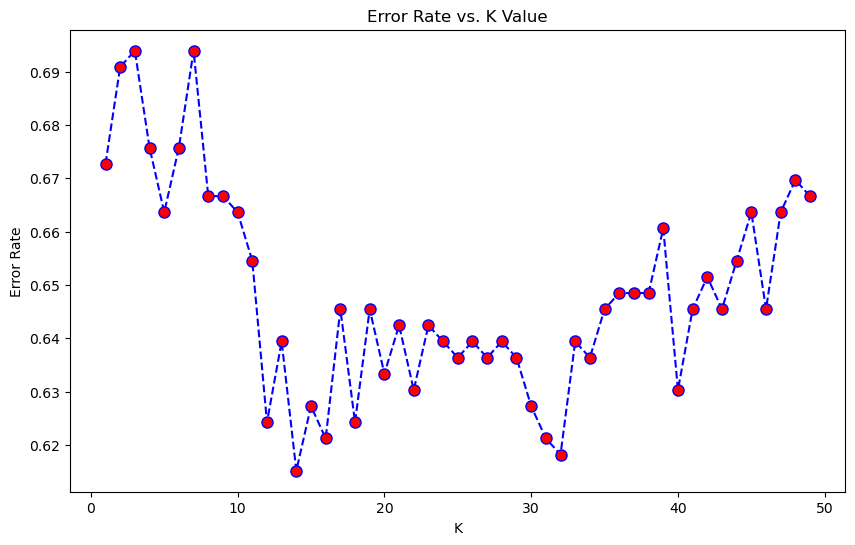

In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 50), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [67]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train,y_train)
kk_pred = knn.predict(X_test)

In [68]:
print (classification_report(y_test,kk_pred))
print('\n')
print (confusion_matrix(y_test,kk_pred))

              precision    recall  f1-score   support

           0       0.36      0.54      0.43        97
           1       0.43      0.27      0.33       127
           2       0.31      0.31      0.31       106

    accuracy                           0.36       330
   macro avg       0.37      0.37      0.36       330
weighted avg       0.37      0.36      0.35       330



[[52 16 29]
 [49 34 44]
 [44 29 33]]


In [69]:
from sklearn.inspection import permutation_importance

result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': result.importances_mean,
    'Importance Std': result.importances_std
}).sort_values('Importance Mean', ascending=False)

importances.head(10)

,Feature,Importance Mean,Importance Std
482,Charger Type_Level 2,0.036667,0.028506
477,Charging Station Location_Houston,0.025758,0.010606
10,Start_Hour,0.019697,0.014165
4,Charging Cost (USD),0.015455,0.011047
479,Charging Station Location_New York,0.015455,0.012960
478,Charging Station Location_Los Angeles,0.013030,0.011973
12,Vehicle Model_Chevy Bolt,0.013030,0.007048
5,State of Charge (Start %),0.010000,0.011662
8,Temperature (°C),0.007879,0.010069
14,Vehicle Model_Nissan Leaf,0.007273,0.014608


In [70]:
##Using Logistic Regression
from sklearn.linear_model import LogisticRegression

In [71]:
logmodel = LogisticRegression(multi_class= 'multinomial')

In [72]:
logmodel.fit(X_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [73]:
l_pred = logmodel.predict(X_test)

In [74]:
print (classification_report(y_test,l_pred))
print('\n')
print (confusion_matrix(y_test,l_pred))

              precision    recall  f1-score   support

           0       0.27      0.24      0.25        97
           1       0.43      0.40      0.41       127
           2       0.34      0.40      0.36       106

    accuracy                           0.35       330
   macro avg       0.34      0.34      0.34       330
weighted avg       0.35      0.35      0.35       330



[[23 31 43]
 [36 51 40]
 [27 37 42]]


In [78]:
coefficients = logmodel.coef_
features = X.columns

importance_df = pd.DataFrame(coefficients.T, columns=logmodel.classes_, index=features)
importance_df.head()


,0,1,2
Battery Capacity (kWh),-0.204005,0.221432,-0.017427
Energy Consumed (kWh),0.351125,-0.266694,-0.084431
Charging Duration (hours),0.071931,0.053475,-0.125406
Charging Rate (kW),-0.068447,0.626689,-0.558242
Charging Cost (USD),0.063363,0.046548,-0.109911


In [79]:
mean_importance = np.mean(np.abs(coefficients), axis=0)
feat_importance = pd.DataFrame({
    'Feature': features,
    'Importance': mean_importance
}).sort_values('Importance', ascending=False)

feat_importance.head(10)

,Feature,Importance
36,Charging Station ID_Station_120,0.807523
38,Charging Station ID_Station_122,0.806962
258,Charging Station ID_Station_337,0.773208
33,Charging Station ID_Station_118,0.743847
153,Charging Station ID_Station_234,0.730262
204,Charging Station ID_Station_283,0.712854
337,Charging Station ID_Station_412,0.690095
94,Charging Station ID_Station_178,0.676750
145,Charging Station ID_Station_226,0.672163
173,Charging Station ID_Station_254,0.671455


## The Ensemble Method


In [80]:
from sklearn.ensemble import VotingClassifier

In [81]:
ensemble = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
        ('xgb', XGBClassifier(eval_metric='mlogloss')),
        ('knn', KNeighborsClassifier(n_neighbors = 13)),
        ('lr', LogisticRegression(max_iter=1000))
    ],
    voting='soft'
)

In [82]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None,
                                            feature_weights=Non...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('knn', KNeighborsClassifier(n_neighbors=13)),
                             ('lr', LogisticRegression(max_iter=1000))],
                 voting='soft')

In [83]:
print("Ensemble Accuracy:", ensemble.score(X_test, y_test))

Ensemble Accuracy: 0.3151515151515151


In [84]:
e_pred = ensemble.predict(X_test)

In [85]:
print (classification_report(y_test,e_pred))
print('\n')
print (confusion_matrix(y_test,e_pred))

              precision    recall  f1-score   support

           0       0.29      0.29      0.29        97
           1       0.34      0.26      0.29       127
           2       0.32      0.41      0.36       106

    accuracy                           0.32       330
   macro avg       0.31      0.32      0.31       330
weighted avg       0.32      0.32      0.31       330



[[28 33 36]
 [38 33 56]
 [31 32 43]]
